# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests
!pip install wordcloud

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import time
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
# print(soup.prettify())

In [ ]:
movie_info = soup.find_all('div', class_='title-list-grid__item')

## **Fetching Movie URL's**

In [ ]:
movie_url_list = []
for movie in movie_info:
  get_link = movie.find('a')['href']
  links = 'https://www.justwatch.com'+ get_link
  movie_url_list.append(links)
movie_url_list
len(movie_url_list)

100

## Scraping the datails

In [ ]:
%%time
# making the empty list for all the details
movie_title_list = []
release_year_list = []
genres_list = []
imdb_rating_list = []
runtime_list = []
age_rating_list = []
production_countries_list = []
streaming_service_list = []

#iterating the movie url from the url list.
for movie_url in movie_url_list:
  print(f"Scraping for movie url {movie_url}")
  # Requesting the response from each movie url
  response = requests.get(movie_url)
  #exception handling for success and not found
  if response.status_code==200:
    url_soup = BeautifulSoup(response.text, 'html.parser')

    #Extract movie title
    title_tag = url_soup.find('div', class_='title-block' )
    if title_tag:
      movie_title = title_tag.find('h1').text.strip()
      movie_title_list.append(movie_title)
    else:
      movie_title_list.append(None)

    #Extract Release Year
    year_tag = url_soup.find('span', class_='text-muted')
    if year_tag:
      release_year = re.sub(r"\(|\)", "", year_tag.text.strip())
      release_year_list.append(release_year)
    else:
      release_year_list.append(None)

    #Extract Genres.
    genre_tag = url_soup.find('h3', text='Genres')
    if genre_tag:
      genres = genre_tag.find_next_sibling('div', class_='detail-infos__value').text.strip()
      genres_list.append(genres)
    else:
      genres_list.append(None)

    #Extract imdb rating
    rating_tag = url_soup.find('img', alt='IMDB')
    if rating_tag:
      imdb_rating = rating_tag.find_next_sibling('span').text.strip()
      imdb_rating_list.append(imdb_rating[:3])
    else:
      imdb_rating_list.append(None)

    # Extract runtime
    runtime_tag = url_soup.find('h3', text='Runtime')
    if runtime_tag:
      runtime = runtime_tag.find_next_sibling('div', class_='detail-infos__value').text.strip()
      runtime_list.append(runtime)
    else:
      runtime_list.append(None)

    #Extract age rating
    age_rating_tag = url_soup.find('h3', text = 'Age rating')
    if age_rating_tag:
      age_rating = age_rating_tag.find_next_sibling('div', class_='detail-infos__value').text.strip()
      age_rating_list.append(age_rating)
    else:
      age_rating_list.append(None)

    #Extract Production countries
    production_tag = url_soup.find('h3', text=' Production country ')
    if production_tag:
      prod_countries = production_tag.find_next_sibling('div', class_='detail-infos__value').text.strip()
      production_countries_list.append(prod_countries)
    else:
      production_countries_list.append(None)

    #Extract streaming service
    streaming = url_soup.find('picture', class_='picture-wrapper')
    if streaming:
      strm_service = streaming.find('img')['alt']
      streaming_service_list.append(strm_service)
    else:
      streaming_service_list.append(None)

  else:
    print(f"Scraping Fail for Movie url {movie_url}")

Scraping for movie url https://www.justwatch.com/in/movie/animal-2022
Scraping for movie url https://www.justwatch.com/in/movie/salaar
Scraping for movie url https://www.justwatch.com/in/movie/dunki
Scraping for movie url https://www.justwatch.com/in/movie/12th-fail
Scraping for movie url https://www.justwatch.com/in/movie/sam-bahadur
Scraping for movie url https://www.justwatch.com/in/movie/oppenheimer
Scraping for movie url https://www.justwatch.com/in/movie/the-kerala-story
Scraping for movie url https://www.justwatch.com/in/movie/anyone-but-you
Scraping for movie url https://www.justwatch.com/in/movie/ssmb-28
Scraping for movie url https://www.justwatch.com/in/movie/dune-2021
Scraping for movie url https://www.justwatch.com/in/movie/aquaman-and-the-lost-kingdom
Scraping for movie url https://www.justwatch.com/in/movie/captain-miller
Scraping for movie url https://www.justwatch.com/in/movie/ayalaan
Scraping for movie url https://www.justwatch.com/in/movie/hanu-man
Scraping for movie

## **Scrapping Movie Title**

In [ ]:
movie_title_list

['Animal',
 'Salaar',
 'Dunki',
 '12th Fail',
 'Sam Bahadur',
 'Oppenheimer',
 'The Kerala Story',
 'Anyone But You',
 'Guntur Kaaram',
 'Dune',
 'Aquaman and the Lost Kingdom',
 'Captain Miller',
 'Ayalaan',
 'Hanu-Man',
 'Fighter',
 'The Beekeeper',
 'Neru',
 'Migration',
 'Jawan',
 'Sapta Sagaradaache Ello: Side B',
 'The Marvels',
 'Poor Things',
 'Anatomy of a Fall',
 'Teri Baaton Mein Aisa Uljha Jiya',
 'Bhakshak',
 'Hi Nanna',
 'Upgraded',
 'Saindhav',
 'Article 370',
 'Killers of the Flower Moon',
 'Society of the Snow',
 'Pindam',
 'Parking',
 'Joram',
 '365 Days',
 'Past Lives',
 'Mission: Impossible - Dead Reckoning Part One',
 'Warning 2',
 'Interstellar',
 'Barbie',
 'Singapore Saloon',
 'Tiger 3',
 "Harry Potter and the Philosopher's Stone",
 'Blue Beetle',
 'Saba Nayagan',
 'The Wolf of Wall Street',
 'Uri: The Surgical Strike',
 '777 Charlie',
 'Leo',
 'Sound of Freedom',
 'Zara Hatke Zara Bachke',
 'American Fiction',
 'Guthlee Ladoo',
 'Yaariyan 2',
 'The Holdovers',


## **Scrapping release Year**

In [ ]:
release_year_list

['2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2024',
 '2021',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2024',
 '2024',
 '2023',
 '2024',
 '2024',
 '2024',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2020',
 '2023',
 '2023',
 '2024',
 '2014',
 '2023',
 '2024',
 '2023',
 '2001',
 '2023',
 '2023',
 '2013',
 '2019',
 '2022',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2024',
 '2024',
 '2018',
 '2024',
 '2023',
 '2024',
 '2023',
 '2024',
 '2016',
 '2024',
 '2023',
 '2019',
 '2023',
 '2009',
 '2023',
 '2023',
 '2023',
 '2023',
 '2024',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2018',
 '2024',
 '2011',
 '2023',
 '2011',
 '2023',
 '2021',
 '2023',
 '2023',
 '2023',
 '2017',
 '2024',
 '2015',
 '2016',
 '2023',
 '2024',
 '2019']

In [ ]:
# Extract release years from the Release_year list
movie_release_years = [year["Release Year"] for year in Release_year]

# Display release years
print(movie_release_years)

['2023', '2023', '2023', '2023', '2023', '2023', '2023', '2024', '2024', '2023', '2021', '2024', '2024', '2024', '2024', '2024', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2024', '2023', '2024', '2024', '2024', '2023', '2023', '2023', '2023', '2024', '2023', '2023', '2020', '2023', '2014', '2023', '2024', '2023', '2024', '2001', '2023', '2023', '2022', '2019', '2013', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2024', '2023', '2018', '2024', '2023', '2023', '2024', '2019', '2016', '2024', '2023', '2023', '2023', '2023', '2024', '2009', '2023', '2023', '2024', '2023', 'Release Year not found', '2023', '2023', '2023', '2011', '2023', '2024', '2018', '2023', '2024', '2021', '2023', '2024', '2023', '2011', '2023', '2023', '2017', '2024', '2023', '2019', '2023', '2023', '2023']


## **Scrapping Genres**

In [ ]:
genres_list

['Action & Adventure, Drama, Mystery & Thriller, Crime',
 'Action & Adventure, Crime, Drama, Mystery & Thriller',
 'Comedy, Drama',
 'Drama',
 'Drama, War & Military, History',
 'Drama, History',
 'Drama',
 'Romance, Comedy',
 'Drama, Kids & Family, Action & Adventure',
 'Science-Fiction, Action & Adventure, Drama',
 'Fantasy, Action & Adventure, Science-Fiction',
 'Drama, Mystery & Thriller, Action & Adventure',
 'Action & Adventure, Science-Fiction',
 'Fantasy, Comedy, Action & Adventure',
 'Action & Adventure, Mystery & Thriller, War & Military',
 'Drama, Action & Adventure, Mystery & Thriller',
 'Drama, Mystery & Thriller',
 'Kids & Family, Animation, Action & Adventure, Comedy',
 'Mystery & Thriller, Action & Adventure, Drama',
 'Action & Adventure, Drama, Romance',
 'Science-Fiction, Action & Adventure, Fantasy',
 'Science-Fiction, Romance, Comedy, Drama',
 'Crime, Mystery & Thriller, Drama',
 'Comedy, Drama, Romance, Science-Fiction',
 'Drama, Crime',
 'Drama, Kids & Family, Rom

## **Scrapping IMBD Rating**

In [ ]:
imdb_rating_list

['6.3',
 '6.5',
 '6.8',
 '9.1',
 '7.8',
 '8.4',
 '7.1',
 '6.3',
 '5.4',
 '8.0',
 '5.7',
 '6.7',
 '6.1',
 '8.4',
 '7.0',
 '6.4',
 '7.6',
 '6.7',
 '7.0',
 '8.1',
 '5.6',
 '8.3',
 '7.8',
 '7.0',
 '7.2',
 '8.2',
 '6.1',
 '5.0',
 '8.7',
 '7.7',
 '7.8',
 '6.9',
 '7.9',
 '6.7',
 '3.3',
 '7.9',
 '7.7',
 '7.5',
 '8.7',
 '6.9',
 '6.4',
 '5.8',
 '7.6',
 '6.0',
 '6.8',
 '8.2',
 '8.2',
 '8.7',
 '7.2',
 '7.7',
 '6.7',
 '7.6',
 '7.7',
 '5.7',
 '8.0',
 '7.0',
 '7.1',
 '7.0',
 '6.6',
 '8.2',
 '7.7',
 '8.1',
 '6.5',
 '7.1',
 '4.5',
 '8.0',
 '6.4',
 '7.9',
 '6.1',
 '6.8',
 '8.4',
 '6.7',
 '5.8',
 '6.7',
 '7.6',
 '8.5',
 '6.1',
 '6.3',
 '8.3',
 '5.2',
 '7.0',
 '6.4',
 '6.5',
 '8.2',
 '8.3',
 '7.7',
 '8.7',
 '7.0',
 None,
 '7.6',
 '5.6',
 '3.3',
 '6.6',
 '8.0',
 '5.9',
 '4.2',
 '7.1',
 '6.7',
 '5.5',
 '6.9']

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
runtime_list

['3h 21min',
 '2h 55min',
 '2h 40min',
 '2h 26min',
 '2h 30min',
 '3h 1min',
 '2h 18min',
 '1h 43min',
 '2h 39min',
 '2h 35min',
 '2h 4min',
 '2h 37min',
 '2h 35min',
 '2h 39min',
 '2h 47min',
 '1h 45min',
 '2h 30min',
 '1h 23min',
 '2h 49min',
 '2h 28min',
 '1h 45min',
 '2h 21min',
 '2h 32min',
 '2h 21min',
 '2h 14min',
 '2h 35min',
 '1h 45min',
 '2h 18min',
 '2h 38min',
 '3h 26min',
 '2h 24min',
 '2h 38min',
 '2h 7min',
 '1h 57min',
 '1h 54min',
 '1h 46min',
 '2h 44min',
 '2h 5min',
 '2h 49min',
 '1h 54min',
 '2h 17min',
 '2h 35min',
 '2h 32min',
 '2h 8min',
 '2h 35min',
 '3h 0min',
 '2h 18min',
 '2h 46min',
 '2h 43min',
 '2h 11min',
 '2h 20min',
 '1h 57min',
 '1h 45min',
 '2h 28min',
 '2h 13min',
 '2h 11min',
 '1h 34min',
 '2h 23min',
 '2h 34min',
 '2h 36min',
 '2h 24min',
 '2h 15min',
 '2h 34min',
 '1h 57min',
 '2h 30min',
 '1h 48min',
 '1h 33min',
 '1h 30min',
 '2h 0min',
 '2h 38min',
 '2h 33min',
 '1h 52min',
 '2h 21min',
 '2h 24min',
 '1h 52min',
 '2h 19min',
 '2h 52min',
 '1h 5

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
age_rating_list

['A',
 'A',
 None,
 None,
 'UA',
 'UA',
 'A',
 None,
 'UA',
 'UA',
 None,
 'UA',
 'U',
 'UA',
 'UA',
 None,
 'UA',
 None,
 'UA',
 'UA',
 None,
 'A',
 None,
 None,
 'A',
 'U',
 None,
 'UA',
 'UA',
 'A',
 None,
 'UA',
 'UA',
 'UA',
 None,
 'UA',
 None,
 None,
 None,
 'UA',
 'UA',
 None,
 'U',
 None,
 None,
 'A',
 'UA',
 'UA',
 'UA',
 None,
 'UA',
 None,
 'U',
 'UA',
 None,
 None,
 None,
 None,
 'UA',
 'UA',
 'UA',
 'U',
 None,
 'U',
 'UA',
 'A',
 None,
 'UA',
 None,
 'UA',
 'A',
 None,
 'UA',
 'A',
 'UA',
 'UA',
 'UA',
 'A',
 None,
 'UA',
 None,
 None,
 None,
 'A',
 'U',
 'UA',
 None,
 'UA',
 None,
 'UA',
 'A',
 'UA',
 None,
 'A',
 None,
 None,
 'A',
 None,
 None,
 None]

## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
production_countries_list

['India',
 'India',
 'India',
 'India',
 'India',
 'United Kingdom, United States',
 'India',
 'Australia, United States',
 'India',
 'United States',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'United Kingdom, United States',
 'India',
 'Canada, France, United States',
 'India',
 'India',
 'United States',
 'Ireland, United Kingdom, United States',
 'France',
 'India',
 'India',
 'India',
 'United Kingdom, United States',
 'India',
 'India',
 'United States',
 'Spain, United States',
 'India',
 'India',
 'India',
 'Poland',
 'South Korea, United States',
 'United States',
 'India',
 'United Kingdom, United States',
 'United Kingdom, United States',
 'India',
 'India',
 'United Kingdom, United States',
 'United States',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'United States',
 'India',
 'India',
 'United States',
 'United States, United Kingdom',
 'Australia, United Kingdom',
 'India',
 'India',
 'India',
 'India',
 'India'

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
streaming_service_list

['Netflix',
 'Netflix',
 'Netflix',
 'Hotstar',
 'Zee5',
 'Apple TV',
 'Zee5',
 'Apple TV',
 'Netflix',
 'Apple TV',
 'Apple TV',
 'Amazon Prime Video',
 'Sun Nxt',
 None,
 None,
 None,
 'Hotstar',
 'Apple TV',
 'Apple TV',
 'Amazon Prime Video',
 'Apple TV',
 'Apple TV',
 None,
 'Bookmyshow',
 'Netflix',
 'Netflix',
 'Amazon Prime Video',
 'Amazon Prime Video',
 None,
 'Apple TV Plus',
 'Netflix',
 'Amazon Prime Video',
 'Hotstar',
 'Amazon Video',
 'Netflix',
 'Lionsgate Play',
 'Apple TV',
 None,
 'Apple TV',
 'Apple TV',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Apple TV',
 'Apple TV',
 'Hotstar',
 'Lionsgate Play',
 'Zee5',
 'Voot',
 'Netflix',
 'Amazon Prime Video',
 None,
 'Amazon Prime Video',
 'Amazon Prime Video',
 None,
 'Bookmyshow',
 None,
 'Apple TV',
 None,
 'Hotstar',
 'Hotstar',
 None,
 'Amazon Prime Video',
 'Bookmyshow',
 'Apple TV',
 'Hotstar',
 'Apple TV',
 'Netflix',
 'Apple TV',
 'Hotstar',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Amazon Prime Video'

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
movies_df = pd.DataFrame()
movies_df['Movie Title'] = movie_title_list
movies_df['Movie Link'] = movie_url_list
movies_df['Release Year'] = release_year_list
movies_df['Genre'] = genres_list
movies_df['IMDB Rating'] = imdb_rating_list
movies_df['Runtime'] = runtime_list
movies_df['Age Rating'] = age_rating_list
movies_df['Production Countries'] = production_countries_list
movies_df['Streaming Service'] = streaming_service_list
movies_df

,Movie Title,Movie Link,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Countries,Streaming Service
0,Animal,https://www.justwatch.com/in/movie/animal-2022,2023,"Action & Adventure, Drama, Mystery & Thriller,...",6.3,3h 21min,A,India,Netflix
1,Salaar,https://www.justwatch.com/in/movie/salaar,2023,"Action & Adventure, Crime, Drama, Mystery & Th...",6.5,2h 55min,A,India,Netflix
2,Dunki,https://www.justwatch.com/in/movie/dunki,2023,"Comedy, Drama",6.8,2h 40min,None,India,Netflix
3,12th Fail,https://www.justwatch.com/in/movie/12th-fail,2023,Drama,9.1,2h 26min,None,India,Hotstar
4,Sam Bahadur,https://www.justwatch.com/in/movie/sam-bahadur,2023,"Drama, War & Military, History",7.8,2h 30min,UA,India,Zee5
...,...,...,...,...,...,...,...,...,...
95,Fifty Shades of Grey,https://www.justwatch.com/in/movie/fifty-shade...,2015,"Drama, Romance, Mystery & Thriller",4.2,2h 5min,None,United States,Netflix
96,Allied,https://www.justwatch.com/in/movie/allied,2016,"Action & Adventure, Drama, War & Military, Rom...",7.1,2h 4min,A,"China, United States, United Kingdom",Apple TV
97,Mangalavaaram,https://www.justwatch.com/in/movie/mangalavaram,2023,"Action & Adventure, Horror, Mystery & Thriller",6.7,2h 25min,None,India,Hotstar
98,Lift,https://www.justwatch.com/in/movie/lift-0,2024,"Action & Adventure, Comedy, Crime, Drama, Myst...",5.5,1h 47min,None,United States,Netflix


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Movie Title           100 non-null    object
 1   Movie Link            100 non-null    object
 2   Release Year          100 non-null    object
 3   Genre                 100 non-null    object
 4   IMDB Rating           99 non-null     object
 5   Runtime               100 non-null    object
 6   Age Rating            60 non-null     object
 7   Production Countries  100 non-null    object
 8   Streaming Service     83 non-null     object
dtypes: object(9)
memory usage: 7.2+ KB


## **Scraping TV  Show Data**

In [ ]:
#importing the concurrency
from concurrent.futures import ThreadPoolExecutor

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
# print(soup.prettify())

In [ ]:
tv_info = soup.find_all('div', class_='title-list-grid__item')

## **Fetching Tv shows Url details**

In [ ]:
tv_url_list = []
for url in tv_info:
  get_link = url.find('a')['href']
  tv_link = 'https://www.justwatch.com' + get_link
  tv_url_list.append(tv_link)

tv_url_list

['https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/true-detective',
 'https://www.justwatch.com/in/tv-show/solo-leveling-2024',
 'https://www.justwatch.com/in/tv-show/indian-police-force',
 'https://www.justwatch.com/in/tv-show/death-and-other-details',
 'https://www.justwatch.com/in/tv-show/aarya',
 'https://www.justwatch.com/in/tv-show/one-day',
 'https://www.justwatch.com/in/tv-show/mr-and-mrs-smith',
 'https://www.justwatch.com/in/tv-show/bigg-boss',
 'https://www.justwatch.com/in/tv-show/jack-reacher',
 'https://www.justwatch.com/in/tv-show/mastram',
 'https://www.justwatch.com/in/tv-show/halo',
 'https://www.justwatch.com/in/tv-show/yellowstone',
 'https://www.justwatch.com/in/tv-show/avatar-the-last-airbender',
 'https://www.justwatch.com/in/tv-show/farzi',
 'https://www.justwatch.com/in/tv-show/jujutsu-kaisen',
 'https://www.justwatch

## Fetching Details from URL in concurrency

In [ ]:
show_title_list = []
show_year_list = []
show_genre_list = []
show_imdb_rating_list = []
show_age_rating_list = []
show_production_country_list = []
show_streaming_list = []
show_runtime_list = []

In [ ]:
%%time
def scrape_show_details(tv_url):
  try:
    # print(f"Scraping tv_show url {tv_url} ")
    response = requests.get(tv_url)
    if response.status_code == 200:
      tv_soup = BeautifulSoup(response.text, 'html.parser')

      #Extract Tv-show title
      show_title_tag = tv_soup.find('div', class_='title-block')
      if show_title_tag:
        show_title = show_title_tag.find('h1').text.strip()

      else:
        show_title = None

      #Extract release year
      show_year_tag = tv_soup.find('span', class_='text-muted')
      if show_year_tag:
        show_year = re.sub(r"\(|\)", "", show_year_tag.text.strip())

      else:
        show_year = None

      #Extract Show genre
      show_genre_tag = tv_soup.find('h3', text = "Genres")
      if show_genre_tag:
        show_genre = show_genre_tag.find_next_sibling('div', class_='detail-infos__value').text.strip()

      else:
        show_genre = None

      #Extract IMDB ratings
      show_imdb_rating_tag = tv_soup.find('img', alt='IMDB')
      if show_imdb_rating_tag:
        show_imdb_rating = show_imdb_rating_tag.find_next_sibling('span').text.strip()

      else:
        show_imdb_rating = None

      #Extract Age rating
      show_age_rating_tag = tv_soup.find('h3', text='Age rating')
      if show_age_rating_tag:
        show_age_rating = show_age_rating_tag.find_next_sibling('div', class_='detail-infos__value').text.strip()

      else:
        show_age_rating =  None

      #Extract show_production country
      show_country_tag = tv_soup.find('h3', text=' Production country ')
      if show_country_tag:
        show_country = show_country_tag.find_next_sibling('div', class_='detail-infos__value').text.strip()

      else:
        show_country = None

      #Extract streaming service
      show_stream_tag = tv_soup.find('picture', class_='picture-wrapper')
      if show_stream_tag:
        show_stream = show_stream_tag.find('img')['alt']

      else:
        show_stream = None

      #Extract runtime
      show_runtime_tag = tv_soup.find('h3', text='Runtime')
      if show_runtime_tag:
        show_runtime = show_runtime_tag.find_next_sibling('div', class_='detail-infos__value').text.strip()

      else:
        show_runtime = None

      return (show_title, show_year, show_genre, show_imdb_rating, show_age_rating, show_country, show_stream, show_runtime)

    else:
      print(f'Scraping Fail for tv-show url {tv_url}')
      return None
  except Exception as e:
      print(f"Exception occurred for {tv_url}: {e}")
      return None

with ThreadPoolExecutor(max_workers=10) as executor:
  results = executor.map(scrape_show_details, tv_url_list)
  # Process the results
  for result in results:
       if result:

           show_title_list.append(result[0])

           show_year_list.append(result[1])
           show_genre_list.append(result[2])
           #'NoneType' object is not subscriptable
           if result[3] is not None:
            show_imdb_rating_list.append(result[3][0:3])
           else:
            show_imdb_rating_list.append(None)

           show_age_rating_list.append(result[4])
           show_production_country_list.append(result[5])
           show_streaming_list.append(result[6])
           show_runtime_list.append(result[7])

CPU times: total: 3.77 s
Wall time: 17.9 s


## **Fetching Tv Show Title details**

In [ ]:
show_title_list

['Panchayat',
 'Game of Thrones',
 'Mirzapur',
 'True Detective',
 'Solo Leveling',
 'Indian Police Force',
 'Death and Other Details',
 'Aarya',
 'One Day',
 'Mr. & Mrs. Smith',
 'Bigg Boss',
 'Reacher',
 'Mastram',
 'Halo',
 'Yellowstone',
 'Avatar: The Last Airbender',
 'Farzi',
 'Jujutsu Kaisen',
 'Young Sheldon',
 'The Twelve',
 'Love Never Lies: Poland',
 'Criminal Justice',
 'Money Heist',
 'Loki',
 'Poacher',
 'Masters of the Air',
 'Aashram',
 'Superman & Lois',
 'Shark Tank India',
 'Scam 1992',
 'Shogun',
 'The Last of Us',
 'Avatar: The Last Airbender',
 'The Bear',
 'The Freelancer',
 'Marry My Husband',
 'Gandii Baat',
 'The Legend of Hanuman',
 'Mashle: Magic and Muscles',
 'Breaking Bad',
 'Spartacus',
 'Fargo',
 'The Rookie',
 'Lucifer',
 'Euphoria',
 'Griselda',
 'The Family Man',
 'Succession',
 'Naruto Shippūden',
 'Gullak',
 'Alexander: The Making of a God',
 'Tokyo Vice',
 'Modern Family',
 'Ek Thi Begum',
 'House',
 'Monarch: Legacy of Monsters',
 'The Railway Me

## **Fetching Release Year**

In [ ]:
show_year_list

['2020',
 '2011',
 '2018',
 '2014',
 '2024',
 '2024',
 '2024',
 '2020',
 '2024',
 '2024',
 '2006',
 '2022',
 '2020',
 '2022',
 '2018',
 '2024',
 '2023',
 '2020',
 '2017',
 '2019',
 '2022',
 '2019',
 '2017',
 '2021',
 '2023',
 '2024',
 '2020',
 '2021',
 '2021',
 '2020',
 '2024',
 '2023',
 '2005',
 '2022',
 '2023',
 '2024',
 '2018',
 '2021',
 '2023',
 '2008',
 '2010',
 '2014',
 '2024',
 '2016',
 '2019',
 '2024',
 '2019',
 '2018',
 '2007',
 '2019',
 '2024',
 '2022',
 '2009',
 '2020',
 '2004',
 '2023',
 '2023',
 '2020',
 '2023',
 '2021',
 '2023',
 '2022',
 '2020',
 '2024',
 '2019',
 '2023',
 '2024',
 '2024',
 '2013',
 '2017',
 '2023',
 '2018',
 '2015',
 '2016',
 '2024',
 '2023',
 '2018',
 '2024',
 '2023',
 '2018',
 '2023',
 '2024',
 '2020',
 '2010',
 '2000',
 '2002',
 '2022',
 '2019',
 '2014',
 '2019',
 '2023',
 '2009',
 '2019',
 '2009',
 '2020',
 '2022',
 '2011',
 '2024',
 '2021',
 '2023']

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
show_genre_list

['Comedy, Drama',
 'Science-Fiction, Action & Adventure, Drama, Fantasy',
 'Drama, Crime, Action & Adventure, Mystery & Thriller',
 'Drama, Mystery & Thriller, Crime',
 'Animation, Action & Adventure, Fantasy, Science-Fiction',
 'Action & Adventure, Crime',
 'Mystery & Thriller, Drama, Crime',
 'Crime, Drama, Mystery & Thriller, Action & Adventure',
 'Comedy, Drama, Romance',
 'Drama, Comedy, Action & Adventure, Mystery & Thriller, Crime',
 'Reality TV, Kids & Family',
 'Action & Adventure, Crime, Drama, Mystery & Thriller',
 'Drama, Comedy, Fantasy',
 'Action & Adventure, Science-Fiction, Mystery & Thriller, War & Military',
 'Drama, Western',
 'Science-Fiction, Action & Adventure, Comedy, Drama, Kids & Family, Fantasy',
 'Crime, Drama, Mystery & Thriller',
 'Fantasy, Mystery & Thriller, Animation, Action & Adventure, Science-Fiction',
 'Comedy, Kids & Family',
 'Mystery & Thriller, Drama',
 'Reality TV',
 'Crime, Mystery & Thriller, Drama',
 'Mystery & Thriller, Action & Adventure, C

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
show_imdb_rating_list

['8.9',
 '9.2',
 '8.5',
 '8.9',
 '8.5',
 '4.9',
 '6.9',
 '7.9',
 '8.2',
 '6.9',
 '3.7',
 '8.1',
 '7.1',
 '7.2',
 '8.7',
 '7.4',
 '8.4',
 '8.6',
 '7.6',
 '7.4',
 None,
 '8.1',
 '8.2',
 '8.2',
 '7.6',
 '7.9',
 '7.4',
 '7.8',
 '8.7',
 '9.3',
 '9.3',
 '8.8',
 '9.3',
 '8.6',
 '8.1',
 '7.9',
 '3.4',
 '9.2',
 '7.6',
 '9.5',
 '8.5',
 '8.9',
 '8.0',
 '8.1',
 '8.3',
 '7.2',
 '8.7',
 '8.8',
 '8.7',
 '9.1',
 '5.2',
 '8.0',
 '8.5',
 '8.6',
 '8.7',
 '7.0',
 '8.5',
 '6.5',
 '7.0',
 '7.9',
 '7.1',
 '8.4',
 None,
 '6.3',
 '8.7',
 None,
 '7.3',
 '8.0',
 '8.8',
 '8.4',
 '8.4',
 '8.3',
 '9.0',
 '8.7',
 '7.8',
 '7.7',
 '8.9',
 '6.1',
 '8.6',
 '8.3',
 '8.1',
 '7.3',
 '8.5',
 '8.1',
 '8.8',
 '8.4',
 '7.0',
 '8.7',
 '7.5',
 '8.0',
 '7.1',
 '7.7',
 '7.8',
 '8.6',
 '7.5',
 '6.8',
 '8.5',
 '7.2',
 '7.3',
 '6.8']

## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
show_age_rating_list

[None,
 'U',
 None,
 'U',
 None,
 'A',
 None,
 None,
 None,
 None,
 None,
 'A',
 None,
 None,
 None,
 None,
 None,
 None,
 'U',
 None,
 None,
 None,
 None,
 None,
 None,
 'A',
 None,
 None,
 'U',
 None,
 None,
 'A',
 'U',
 None,
 None,
 None,
 'A',
 None,
 None,
 'U',
 None,
 None,
 None,
 'U',
 'A',
 None,
 None,
 'U',
 'U',
 None,
 None,
 'A',
 None,
 None,
 'U',
 None,
 None,
 None,
 None,
 'UA',
 None,
 'A',
 None,
 None,
 None,
 None,
 None,
 None,
 'A',
 None,
 None,
 None,
 'A',
 None,
 None,
 None,
 None,
 None,
 None,
 'A',
 None,
 None,
 None,
 'U',
 'U',
 None,
 'A',
 'A',
 None,
 'A',
 None,
 'U',
 None,
 None,
 None,
 None,
 'U',
 'A',
 'A',
 'A']

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
show_production_country_list

['India',
 'United States',
 'India',
 'United States',
 'South Korea, Japan',
 'India',
 'United States',
 'India',
 'United Kingdom',
 'United States',
 'India',
 'United States',
 'India',
 'United States',
 'United States',
 'United States',
 'India',
 'United States, Japan',
 'United States',
 'Belgium',
 'Poland',
 'India',
 'Spain',
 'United States',
 'United States, India',
 'United States',
 'India',
 'United States',
 'India',
 'India',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'South Korea',
 'India',
 'India',
 'Japan',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'United States',
 'Japan',
 'India',
 'United Kingdom',
 'United States',
 'United States',
 'India',
 'United States',
 'United States',
 'India',
 'Mexico',
 'Spain',
 'India',
 'United States',
 'United States',
 'South Korea',
 'India',
 'Japan',
 'India',
 'Japan',
 'United Stat

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
show_streaming_list

['Amazon Prime Video',
 'Jio Cinema',
 'Amazon Prime Video',
 'Jio Cinema',
 'Crunchyroll',
 'Amazon Prime Video',
 'Hotstar',
 'Hotstar',
 'Netflix',
 'Amazon Prime Video',
 'Voot',
 'Amazon Prime Video',
 None,
 'Voot',
 'Netflix',
 'Netflix',
 'Amazon Prime Video',
 'Crunchyroll',
 'Amazon Prime Video',
 'Netflix',
 'Netflix',
 'Hotstar',
 'Netflix',
 'Hotstar',
 'Amazon Prime Video',
 'Apple TV Plus',
 'MX Player',
 'Amazon Prime Video',
 'Sony Liv',
 'Sony Liv',
 'Hotstar',
 'Jio Cinema',
 None,
 'Hotstar',
 'Hotstar',
 'Amazon Prime Video',
 'Alt Balaji',
 'Hotstar',
 'Crunchyroll',
 'Netflix',
 'Lionsgate Play',
 None,
 None,
 'Netflix',
 'Jio Cinema',
 'Netflix',
 'Amazon Prime Video',
 'Jio Cinema',
 'Crunchyroll',
 'Sony Liv',
 'Netflix',
 'Lionsgate Play',
 'Hotstar',
 'MX Player',
 'Netflix',
 'Apple TV Plus',
 'Netflix',
 'Netflix',
 'Netflix',
 'Sony Liv',
 None,
 'Jio Cinema',
 'Netflix',
 'Netflix',
 'Crunchyroll',
 'Sony Liv',
 'Netflix',
 None,
 'Netflix',
 'Hotstar',

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
show_runtime_list

['33min',
 '58min',
 '50min',
 '1h 1min',
 '24min',
 '38min',
 '47min',
 '46min',
 '29min',
 '49min',
 '1h 15min',
 '48min',
 '28min',
 '52min',
 '50min',
 '54min',
 '56min',
 '23min',
 '19min',
 '54min',
 '48min',
 '50min',
 '50min',
 '49min',
 '47min',
 '53min',
 '43min',
 '42min',
 '56min',
 '52min',
 '50min',
 '58min',
 '24min',
 '33min',
 '50min',
 '1h 3min',
 '44min',
 '21min',
 '23min',
 '47min',
 '54min',
 '52min',
 '43min',
 '47min',
 '58min',
 '55min',
 '45min',
 '1h 4min',
 '23min',
 '29min',
 '39min',
 '58min',
 '21min',
 '30min',
 '44min',
 '46min',
 '59min',
 '34min',
 '48min',
 '44min',
 '39min',
 '1h 2min',
 '1h 13min',
 '51min',
 '26min',
 '44min',
 '53min',
 '36min',
 '58min',
 '52min',
 '56min',
 '24min',
 '50min',
 '1h 1min',
 '25min',
 '1h 6min',
 '31min',
 '1h 5min',
 '51min',
 '31min',
 '29min',
 '53min',
 '47min',
 '46min',
 '33min',
 '23min',
 '58min',
 '1h 1min',
 '42min',
 '57min',
 '24min',
 '42min',
 '54min',
 '22min',
 '49min',
 '45min',
 '54min',
 '48min'

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
tv_show_df = pd.DataFrame()
tv_show_df['Show Title'] = show_title_list
tv_show_df['TV Show Link'] = tv_url_list
tv_show_df['Release Year'] = show_year_list
tv_show_df['Show Genre'] = show_genre_list
tv_show_df['IMDB Rating'] = show_imdb_rating_list
tv_show_df['Age Rating'] = show_age_rating_list
tv_show_df['Production Country'] = show_production_country_list
tv_show_df['Streaming Service'] = show_streaming_list
tv_show_df['Runtime'] = show_runtime_list

tv_show_df

,Show Title,TV Show Link,Release Year,Show Genre,IMDB Rating,Age Rating,Production Country,Streaming Service,Runtime
0,Panchayat,https://www.justwatch.com/in/tv-show/panchayat,2020,"Comedy, Drama",8.9,None,India,Amazon Prime Video,33min
1,Game of Thrones,https://www.justwatch.com/in/tv-show/game-of-t...,2011,"Science-Fiction, Action & Adventure, Drama, Fa...",9.2,U,United States,Jio Cinema,58min
2,Mirzapur,https://www.justwatch.com/in/tv-show/mirzapur,2018,"Drama, Crime, Action & Adventure, Mystery & Th...",8.5,None,India,Amazon Prime Video,50min
3,True Detective,https://www.justwatch.com/in/tv-show/true-dete...,2014,"Drama, Mystery & Thriller, Crime",8.9,U,United States,Jio Cinema,1h 1min
4,Solo Leveling,https://www.justwatch.com/in/tv-show/solo-leve...,2024,"Animation, Action & Adventure, Fantasy, Scienc...",8.5,None,"South Korea, Japan",Crunchyroll,24min
...,...,...,...,...,...,...,...,...,...
95,The Great Indian Murder,https://www.justwatch.com/in/tv-show/the-great...,2022,"Crime, Mystery & Thriller",6.8,None,India,Hotstar,45min
96,Shameless,https://www.justwatch.com/in/tv-show/shameless,2011,"Drama, Comedy",8.5,U,United States,Netflix,54min
97,Criminal Record,https://www.justwatch.com/in/tv-show/criminal-...,2024,"Mystery & Thriller, Crime, Drama",7.2,A,"United Kingdom, United States",Apple TV Plus,48min
98,Sunflower,https://www.justwatch.com/in/tv-show/sunflower...,2021,"Comedy, Crime",7.3,A,India,VI movies and tv,37min


In [ ]:
tv_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Show Title          100 non-null    object
 1   TV Show Link        100 non-null    object
 2   Release Year        100 non-null    object
 3   Show Genre          100 non-null    object
 4   IMDB Rating         97 non-null     object
 5   Age Rating          32 non-null     object
 6   Production Country  100 non-null    object
 7   Streaming Service   93 non-null     object
 8   Runtime             100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB


## **Task 2 :- Data Filtering & Analysis**

### **For Movies**

In [ ]:
# Write Your Code here
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Movie Title           100 non-null    object
 1   Movie Link            100 non-null    object
 2   Release Year          100 non-null    object
 3   Genre                 100 non-null    object
 4   IMDB Rating           99 non-null     object
 5   Runtime               100 non-null    object
 6   Age Rating            60 non-null     object
 7   Production Countries  100 non-null    object
 8   Streaming Service     83 non-null     object
dtypes: object(9)
memory usage: 7.2+ KB


In [ ]:
# Changing the type of some columns.
movies_df['Release Year'] = movies_df['Release Year'].astype(int)
movies_df['IMDB Rating'] = movies_df['IMDB Rating'].astype(float)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Movie Title           100 non-null    object 
 1   Movie Link            100 non-null    object 
 2   Release Year          100 non-null    int32  
 3   Genre                 100 non-null    object 
 4   IMDB Rating           99 non-null     float64
 5   Runtime               100 non-null    object 
 6   Age Rating            60 non-null     object 
 7   Production Countries  100 non-null    object 
 8   Streaming Service     83 non-null     object 
dtypes: float64(1), int32(1), object(7)
memory usage: 6.8+ KB


In [ ]:
# Write Your Code here
filtered_movie_df = movies_df[(movies_df['Release Year'] >=2022) & (movies_df['IMDB Rating'] >=7) ]
len(filtered_movie_df)

40

### **For Tv-Shows**

In [ ]:
tv_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Title          100 non-null    object 
 1   TV Show Link        100 non-null    object 
 2   Release Year        100 non-null    int32  
 3   Show Genre          100 non-null    object 
 4   IMDB Rating         97 non-null     float64
 5   Age Rating          32 non-null     object 
 6   Production Country  100 non-null    object 
 7   Streaming Service   93 non-null     object 
 8   Runtime             100 non-null    object 
dtypes: float64(1), int32(1), object(7)
memory usage: 6.8+ KB


In [ ]:
# Changing the type for IMDB and Year.
tv_show_df['Release Year'] = tv_show_df['Release Year'].astype(int)
tv_show_df['IMDB Rating'] = tv_show_df['IMDB Rating'].astype(float)
tv_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Title          100 non-null    object 
 1   TV Show Link        100 non-null    object 
 2   Release Year        100 non-null    int32  
 3   Show Genre          100 non-null    object 
 4   IMDB Rating         97 non-null     float64
 5   Age Rating          32 non-null     object 
 6   Production Country  100 non-null    object 
 7   Streaming Service   93 non-null     object 
 8   Runtime             100 non-null    object 
dtypes: float64(1), int32(1), object(7)
memory usage: 6.8+ KB


In [ ]:
filtered_tv_show_df = tv_show_df[(tv_show_df['Release Year'] >=2022) & (tv_show_df['IMDB Rating'] >=7) ]
len(filtered_tv_show_df)

33

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

###  For Movies

In [ ]:
# Write Your Code here
mean_imdb_movie = movies_df['IMDB Rating'].mean()
avg_imdb_movie = round(mean_imdb_movie, 2)
print(f"The Average IMDB Rating for Movies is {avg_imdb_movie}")

The Average IMDB Rating for Movies is 7.01


### For TV Shows

In [ ]:
mean_imdb_tv = tv_show_df['IMDB Rating'].mean()
avg_imdb_tv = round(mean_imdb_tv, 2)
print(f"The Average IMDB Rating for TV show is {avg_imdb_tv}")

The Average IMDB Rating for TV show is 7.92


## **Analyzing Top Genres**

### For Movies

In [ ]:
# Write Your Code here
# Write Your Code here
genre_count_movie = movies_df['Genre'].value_counts()
sorted_movie_genre = genre_count_movie.sort_values(ascending=False)
top_5_genre = sorted_movie_genre.head()
top_5_genre

Drama                         5
Comedy, Drama                 3
Romance, Comedy               3
Drama, Mystery & Thriller     3
Horror, Mystery & Thriller    3
Name: Genre, dtype: int64

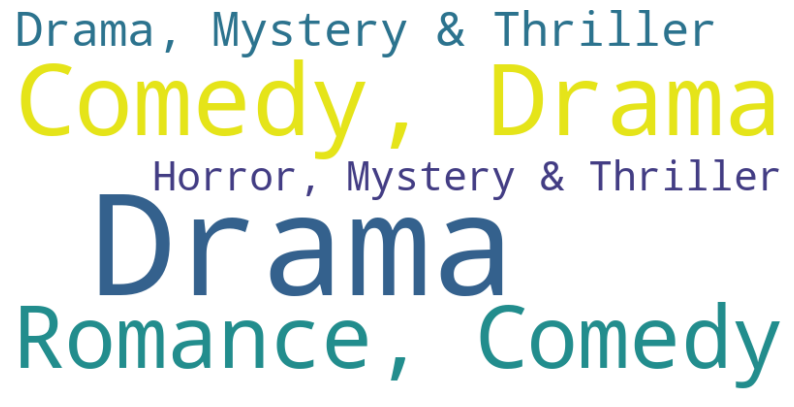

In [ ]:
#Let's Visvalize it using word cloud
movie_top_genre_dict = top_5_genre.to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(movie_top_genre_dict)

#Display the wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### For TV Shows

In [ ]:
genre_count_tv = tv_show_df['Show Genre'].value_counts()
sorted_tv_genre = genre_count_tv.sort_values(ascending=False)
top_5 = sorted_tv_genre.head()
top_5

Crime, Drama, Mystery & Thriller    8
Drama                               6
Comedy                              3
Drama, Comedy                       3
Comedy, Drama, Romance              2
Name: Show Genre, dtype: int64

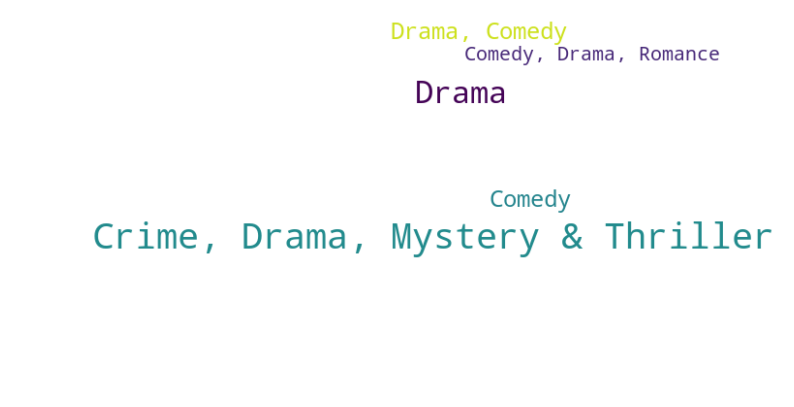

In [ ]:
#Let's Visvalize it using word cloud
tv_top_genre_dict = top_5.to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tv_top_genre_dict)

#Display the wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

### For Movies

In [ ]:
# Write Your Code here
# Write Your Code here
movie_streaming_service_count = movies_df['Streaming Service'].value_counts()
most_common_movie_service = movie_streaming_service_count.idxmax()
most_common_movie_service

'Apple TV'

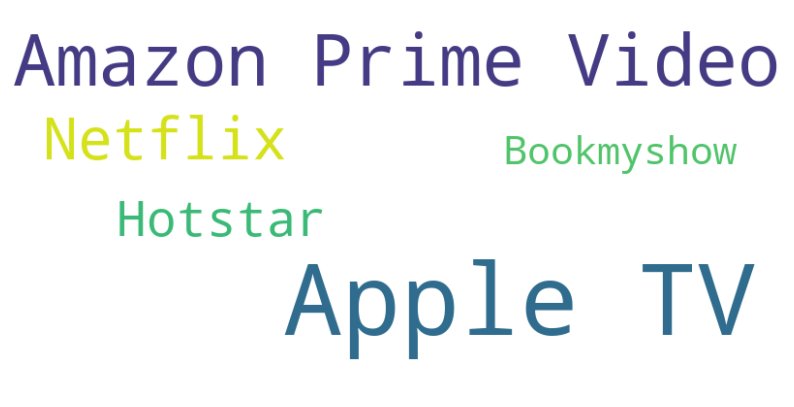

In [ ]:
#Let's Visvalize it using word cloud
top_5_movie_service_dict = movie_streaming_service_count.head().to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_5_movie_service_dict)

#Display the wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### For TV Shows

In [ ]:
# Write Your Code here
tv_streaming_service_count = tv_show_df['Streaming Service'].value_counts()
most_common_tv_service = tv_streaming_service_count.idxmax()
most_common_tv_service

'Netflix'

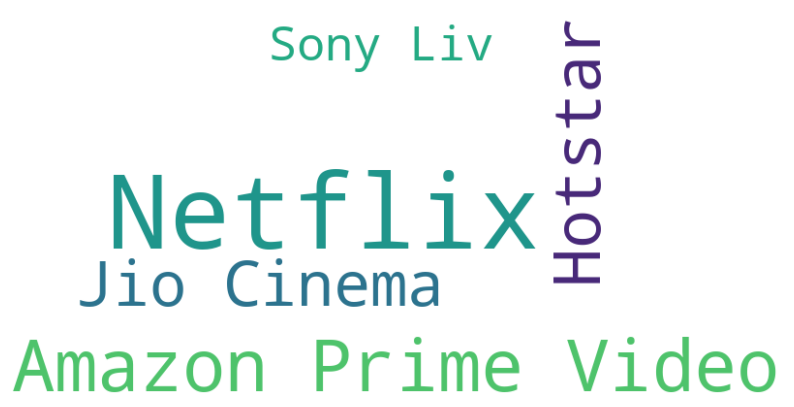

In [ ]:
top_5_tv_service_dict = tv_streaming_service_count.head().to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_5_tv_service_dict)

#Display the wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
filtered_movie_df.head()

,Movie Title,Movie Link,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Countries,Streaming Service
3,12th Fail,https://www.justwatch.com/in/movie/12th-fail,2023,Drama,9.1,2h 26min,None,India,Hotstar
4,Sam Bahadur,https://www.justwatch.com/in/movie/sam-bahadur,2023,"Drama, War & Military, History",7.8,2h 30min,UA,India,Zee5
5,Oppenheimer,https://www.justwatch.com/in/movie/oppenheimer,2023,"Drama, History",8.4,3h 1min,UA,"United Kingdom, United States",Apple TV
6,The Kerala Story,https://www.justwatch.com/in/movie/the-kerala-...,2023,Drama,7.1,2h 18min,A,India,Zee5
13,Hanu-Man,https://www.justwatch.com/in/movie/hanu-man,2024,"Fantasy, Comedy, Action & Adventure",8.4,2h 39min,UA,India,None


In [ ]:
filtered_tv_show_df.head()

,Show Title,TV Show Link,Release Year,Show Genre,IMDB Rating,Age Rating,Production Country,Streaming Service,Runtime
4,Solo Leveling,https://www.justwatch.com/in/tv-show/solo-leve...,2024,"Animation, Action & Adventure, Fantasy, Scienc...",8.5,None,"South Korea, Japan",Crunchyroll,24min
8,One Day,https://www.justwatch.com/in/tv-show/one-day,2024,"Comedy, Drama, Romance",8.2,None,United Kingdom,Netflix,29min
11,Reacher,https://www.justwatch.com/in/tv-show/jack-reacher,2022,"Action & Adventure, Crime, Drama, Mystery & Th...",8.1,A,United States,Amazon Prime Video,48min
13,Halo,https://www.justwatch.com/in/tv-show/halo,2022,"Action & Adventure, Science-Fiction, Mystery &...",7.2,None,United States,Voot,52min
15,Avatar: The Last Airbender,https://www.justwatch.com/in/tv-show/avatar-th...,2024,"Science-Fiction, Action & Adventure, Comedy, D...",7.4,None,United States,Netflix,54min


In [ ]:
#saving final dataframe as Final Data in csv format
#saving final dataframe as Final Data in csv format
movies_df.to_csv('Just watch Movies Info.csv', index=False)
tv_show_df.to_csv('Just watch TV Show Info.csv', index=False)

In [ ]:
#saving filter data as Filter Data in csv format
filtered_movie_df.to_csv('Recent Good Movies Info.csv', index=False)
filtered_tv_show_df.to_csv('Recent Good TV Show Info.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***